# Loading Packages

In [107]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from pathlib import Path
import os, re
from datetime import date, datetime
import collections

# Read Data files

In [108]:
train_data = pd.read_csv("C:\\Users\\raja ajay\\Documents\\ML competitions\\Football Prediction\\train.csv")
test_data=pd.read_csv("C:\\Users\\raja ajay\\Documents\\ML competitions\\Football Prediction\\test.csv")

# Keeping only relevant columns 

In [109]:
train_data=train_data[['league','Team 1','Team2','SPI1','SPI2','proj_score1','proj_score2','Outcome']]

# Encoding categorical data in train set

In [110]:
le = LabelEncoder()
train_data[['league_en']]=le.fit_transform(train_data['league'])
train_data[['Team1_en']]=le.fit_transform(train_data['Team 1'])
train_data[['Team2_en']]=le.fit_transform(train_data['Team2'])

# Using xGboost to do feature importance & get baseline performance

In [115]:
features_in_use=['SPI1','SPI2','proj_score1','proj_score2','league_en','Team1_en','Team2_en']

In [116]:
y_var = ['Outcome']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(train_data[features_in_use],train_data[y_var] , 
                                                    test_size=0.33, random_state=7)

In [119]:
model_xgb = xgb.XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
#model_xgb.fit(train_data[features_in_use],train_data[y_var])
model_xgb.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [70]:
results = model_xgb.evals_result()
print(results)

{'validation_0': OrderedDict([('logloss', [0.447892, 0.310695, 0.223156, 0.164005, 0.122651, 0.093245, 0.07211, 0.056655, 0.045277, 0.036899, 0.03061, 0.025955, 0.022667, 0.019893, 0.017907, 0.016179, 0.014739, 0.013779, 0.012928, 0.012062, 0.011409, 0.01075, 0.010335, 0.009708, 0.009399, 0.008939, 0.008647, 0.008249, 0.007955, 0.00761, 0.00729, 0.007044, 0.0069, 0.006651, 0.006479, 0.006179, 0.005907, 0.005738, 0.00565, 0.005443, 0.005261, 0.005182, 0.005018, 0.004931, 0.004782, 0.004649, 0.004534, 0.004443, 0.004341, 0.004256, 0.004167, 0.004078, 0.00398, 0.003903, 0.003845, 0.003803, 0.003702, 0.003636, 0.003571, 0.003507, 0.003447, 0.00339, 0.003343, 0.00328, 0.00323, 0.003184, 0.003139, 0.003102, 0.003062, 0.003009, 0.002971, 0.002937, 0.002915, 0.002886, 0.00285, 0.002814, 0.002784, 0.002752, 0.002722, 0.002695, 0.002673, 0.002644, 0.002618, 0.002596, 0.002574, 0.002549, 0.002524, 0.002502, 0.002485, 0.002463, 0.002448, 0.002418, 0.002398, 0.002378, 0.002361, 0.002345, 0.002329, 

100

In [120]:
X_Vars=train_data[features_in_use]
feat_imp=pd.DataFrame()
feat_imp['Features']=X_Vars.columns.values
feat_imp['importance']=model_xgb.feature_importances_ * 100
feat_imp=feat_imp.sort_values(by='importance', ascending=False)
feat_imp

,Features,importance
3,proj_score2,64.311867
2,proj_score1,30.681908
4,league_en,1.491853
1,SPI2,0.987282
5,Team1_en,0.974939
6,Team2_en,0.783090
0,SPI1,0.769064


# Using symbolic regression in AutoML Tool to identify model configuration using only Projected scores

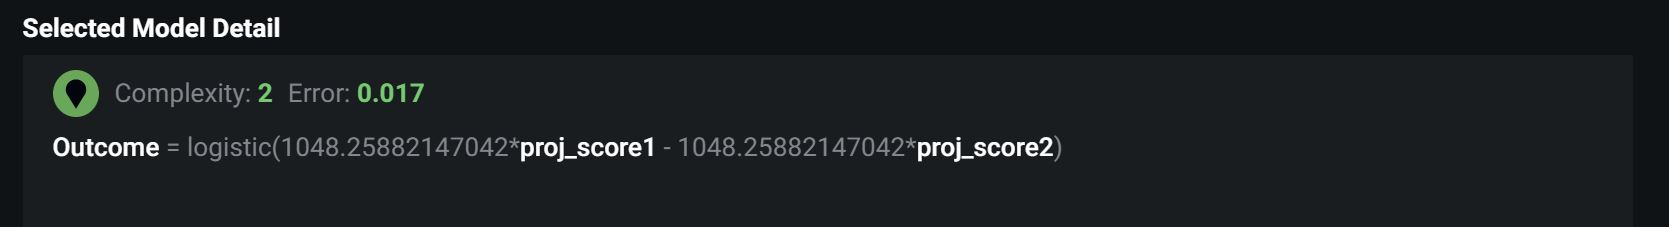

# Predict using final equation for submission

In [121]:
constant=1048.25882147042
test_data['pred_term']=((constant*test_data['proj_score1'])-(constant*test_data['proj_score2']))
test_data['Outcome']=1/(1+np.exp(-test_data['pred_term']))

In [122]:
test_data.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,pred_term,Outcome
0,2021,14/12/21,2411,BPL,Arsenal,West Ham United,79.65,74.06,1.67,1.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,503.164234,1.000000e+00
1,2021,14/12/21,2411,BPL,Brighton and Hove Albion,Wolverhampton,74.19,71.14,1.35,0.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.855764,1.000000e+00
2,2021,14/12/21,2411,BPL,Norwich City,Aston Villa,60.67,71.45,1.18,1.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-324.960235,7.439834e-142
3,2021,14/12/21,2411,BPL,Leicester City,Tottenham Hotspur,76.88,79.06,1.52,1.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.860706,1.000000e+00
4,2021,14/12/21,2411,BPL,Brentford,Manchester United,63.53,85.58,0.95,1.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1016.811057,0.000000e+00


In [124]:
submission_df=test_data[['Outcome']]
submission_df.to_csv('my_submission_file.csv', index=False)